#Minitarea 6

Por: Simón Patiño Idarraga

#*Ensayo del codigo para un $\alpha$ general*#

In [ ]:
import sympy as sp
import numpy as np

In [ ]:
alpha,xo,yo,zo,r1o,r2o = sp.symbols('alpha x_o y_o z_o r_1o r_2o')

r1 = sp.sqrt((xo+alpha)**2+yo**2+zo**2)
r2 = sp.sqrt((xo+alpha-1)**2+yo**2+zo**2)

In [ ]:
U = (1-alpha)/r1 + alpha/r2 + (xo**2 + yo**2)/2
U

alpha/sqrt(y_o**2 + z_o**2 + (alpha + x_o - 1)**2) + x_o**2/2 + y_o**2/2 + (1 - alpha)/sqrt(y_o**2 + z_o**2 + (alpha + x_o)**2)

In [ ]:
Uxx = sp.diff(U,xo,2).subs(r1,r1o).subs(r2,r2o)
Uxx



-alpha/r_2o**3 + 3*alpha*(alpha + x_o - 1)**2/r_2o**5 + 1 + (alpha - 1)/r_1o**3 - 3*(alpha - 1)*(alpha + x_o)**2/r_1o**5

In [ ]:
Uyy = sp.diff(U,yo,2).subs(r1,r1o).subs(r2,r2o)
Uyy

-alpha/r_2o**3 + 3*alpha*y_o**2/r_2o**5 + 1 + (alpha - 1)/r_1o**3 - 3*y_o**2*(alpha - 1)/r_1o**5

In [ ]:
Uxy = sp.diff(sp.diff(U,xo),yo).subs(r1,r1o).subs(r2,r2o)
Uxy

-3*alpha*y_o*(-alpha - x_o + 1)/r_2o**5 - 3*y_o*(1 - alpha)*(-alpha - x_o)/r_1o**5

In [ ]:
A = sp.Matrix([[0,0,1,0],[0,0,0,1],[Uxx,Uxy,0,2],[Uxy,Uyy,-2,0]])
A

Matrix([
[                                                                                                                       0,                                                                                                0,  1, 0],
[                                                                                                                       0,                                                                                                0,  0, 1],
[-alpha/r_2o**3 + 3*alpha*(alpha + x_o - 1)**2/r_2o**5 + 1 + (alpha - 1)/r_1o**3 - 3*(alpha - 1)*(alpha + x_o)**2/r_1o**5,               -3*alpha*y_o*(-alpha - x_o + 1)/r_2o**5 - 3*y_o*(1 - alpha)*(-alpha - x_o)/r_1o**5,  0, 2],
[                                      -3*alpha*y_o*(-alpha - x_o + 1)/r_2o**5 - 3*y_o*(1 - alpha)*(-alpha - x_o)/r_1o**5, -alpha/r_2o**3 + 3*alpha*y_o**2/r_2o**5 + 1 + (alpha - 1)/r_1o**3 - 3*y_o**2*(alpha - 1)/r_1o**5, -2, 0]])

___

#*Reemplazo de los simbolos por valores numericos de una orbita periodica.*#

##*Para este caso, usaremos de ejemplo el sistema Tierra-Luna. La orbita seleccionada es de la familia axial y esta centrada alrededor de L5*

In [ ]:
#Hallemos r1 y r2

alphaNum=1.215058560962404E-2

xoNum, yoNum, zoNum =9.5209214405141196E-1,	1.4479642000595368E-2,	1.0000000000000001E-1

valuesForR = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum}

r1Numeric = r1.subs(valuesForR)

r2Numeric = r2.subs(valuesForR)

r1Numeric, r2Numeric

(0.969522409094618, 0.107183218903703)

##*Reemplazo de los valores numercios en $A$*

In [ ]:
values = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum,r1o:r1Numeric,r2o:r2Numeric }

numeric_expression = A.subs(values)

numeric_expression

Matrix([
[                0,                 0,  1, 0],
[                0,                 0,  0, 1],
[-3.44042183983296,  -1.2858539667461,  0, 2],
[ -1.2858539667461, -9.41070794195355, -2, 0]])

##*Hallando los autovalores*

In [ ]:
numeric_expression.eigenvals()

{4.4985252195537e-64 - 3.84332854693383*I: 1,
 9.58245492744808e-64 - 1.44220506936773*I: 1,
 7.52633697432354e-64 + 1.44220506936773*I: 1,
 4.55756512674104e-64 + 3.84332854693383*I: 1}

##*Todos los autovalores 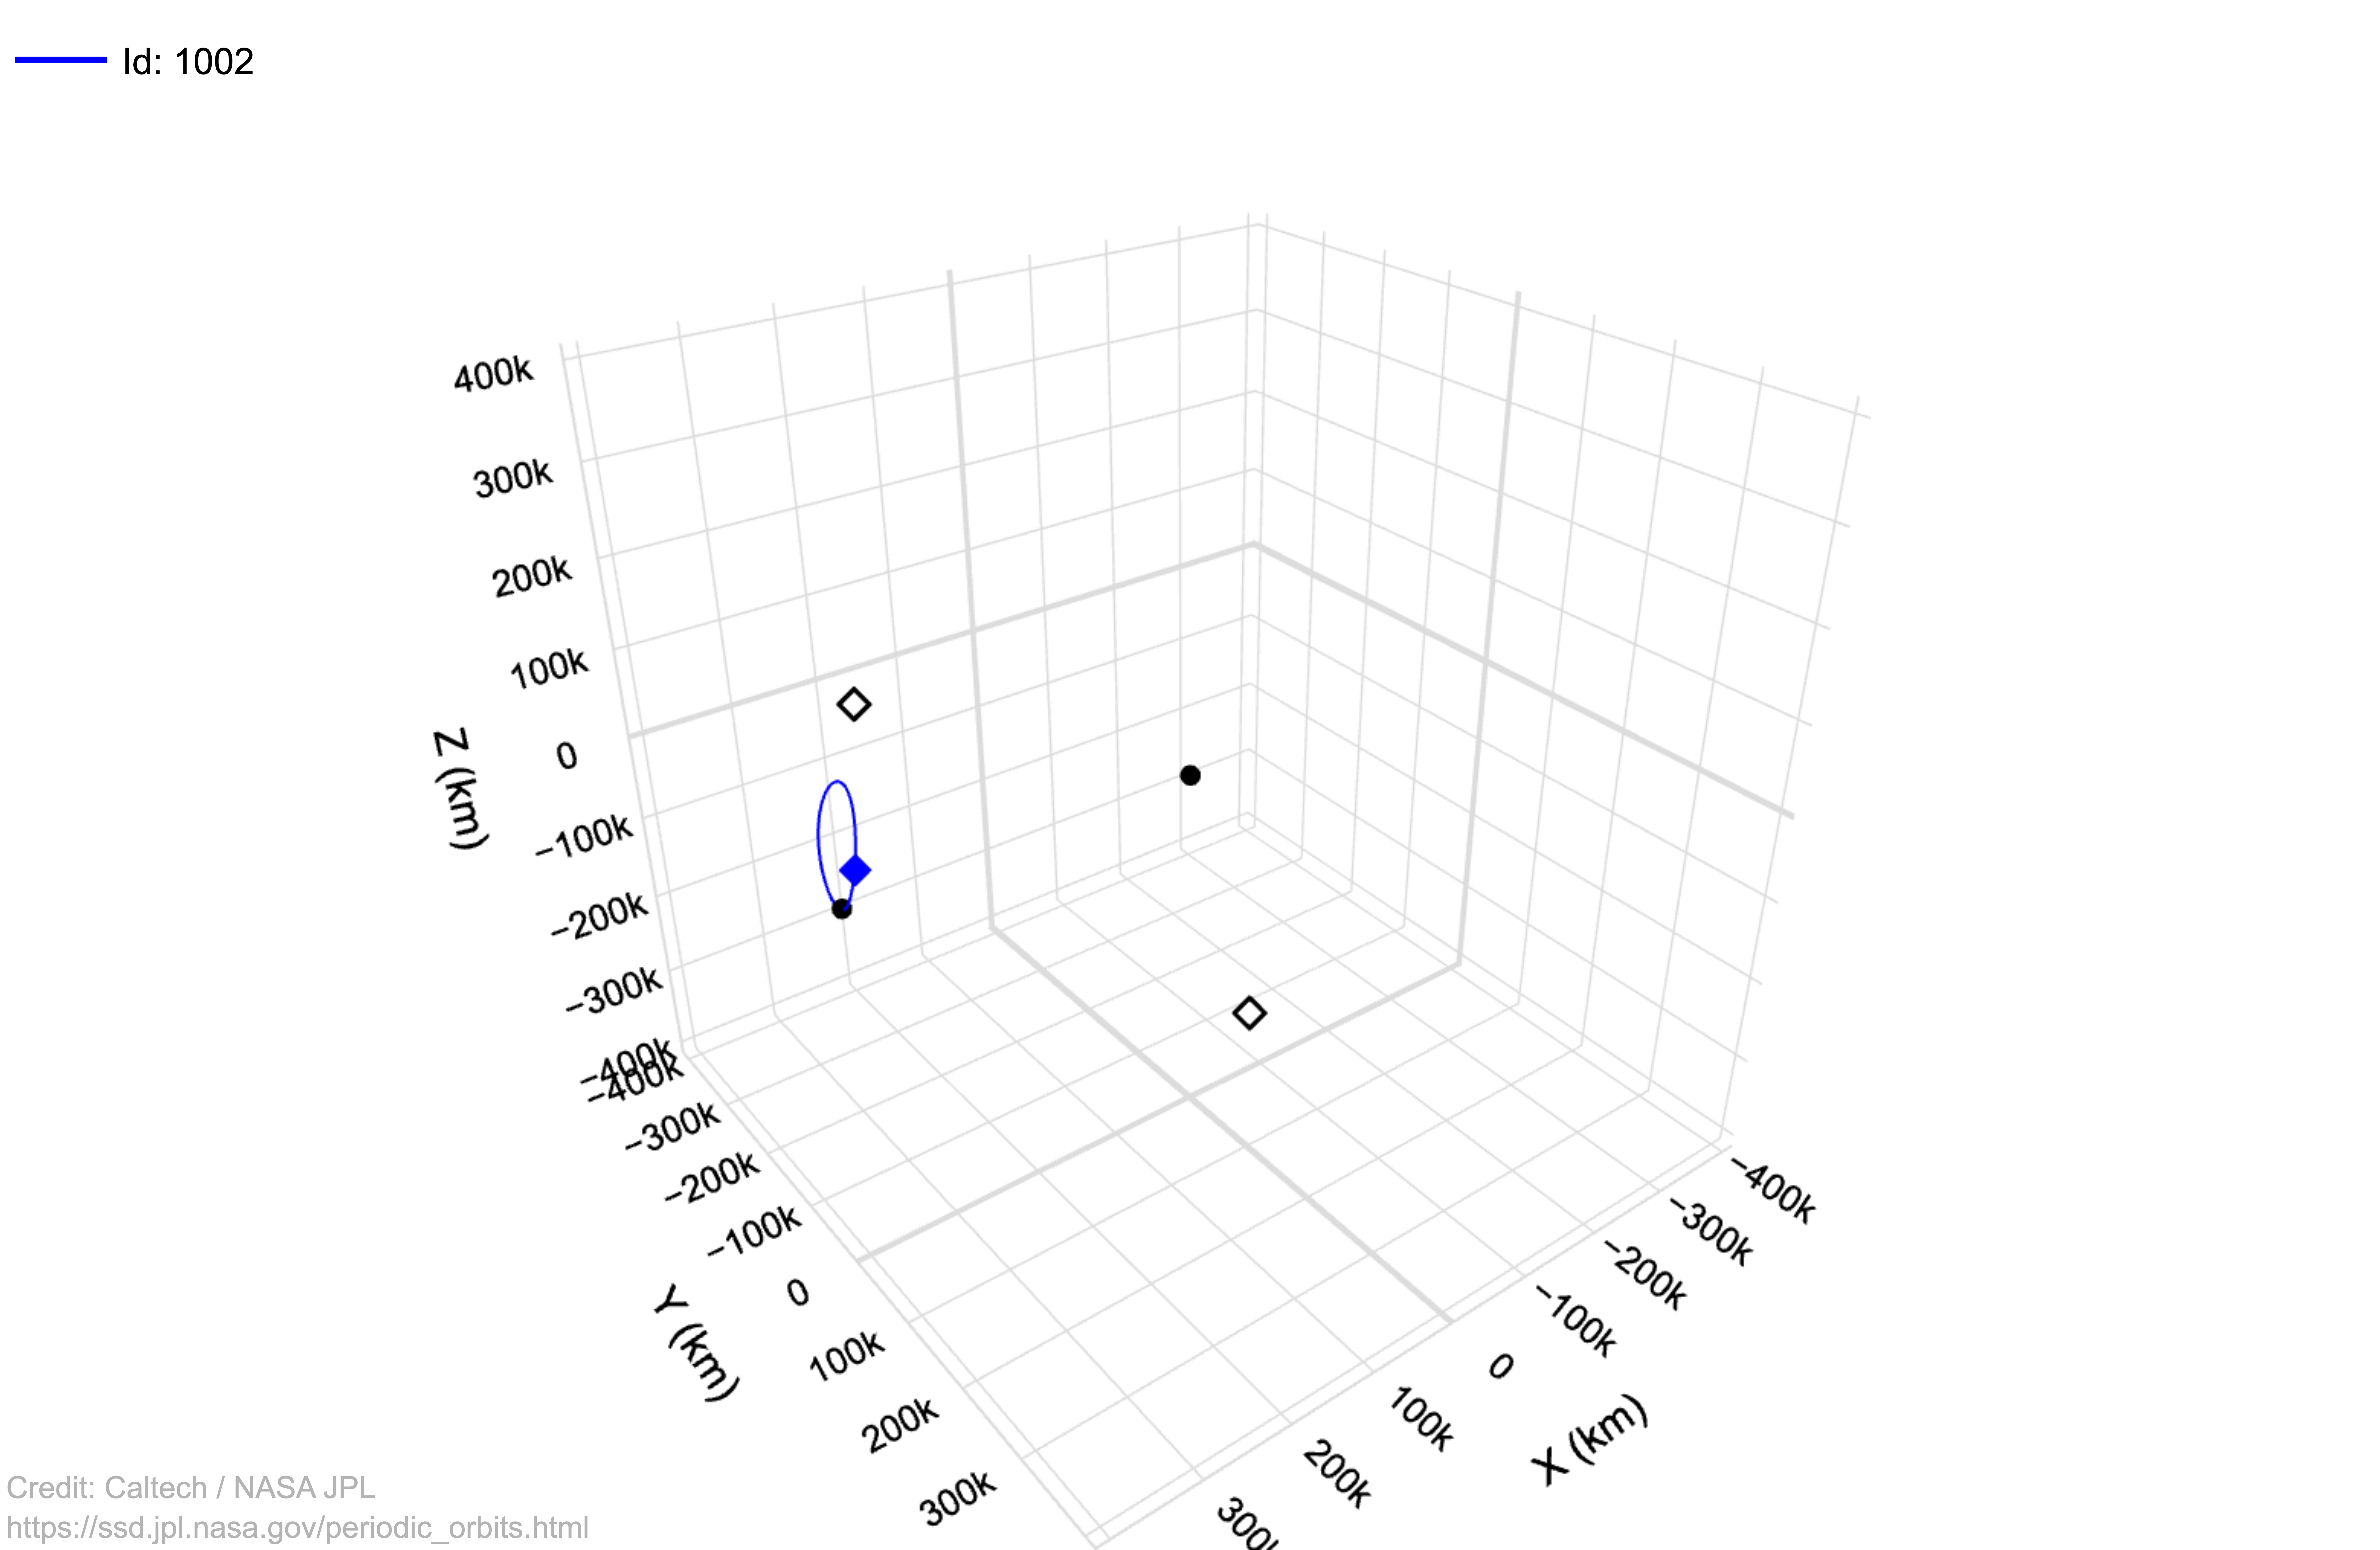tienen solamente componente imaginaria, la orbita es estable.*

#*Rutina para Hallar $A$ para cualquier $\alpha$*

In [ ]:
def getA(alfa):

  alpha,xo,yo,zo,r1o,r2o = sp.symbols('alpha x_o y_o z_o r_1o r_2o')

  r1 = sp.sqrt((xo+alpha)**2+yo**2+zo**2)
  r2 = sp.sqrt((xo+alpha-1)**2+yo**2+zo**2)
  U = (1-alpha)/r1 + alpha/r2 + (xo**2 + yo**2)/2
  Uxx = sp.diff(U,xo,2).subs(r1,r1o).subs(r2,r2o)
  Uyy = sp.diff(U,yo,2).subs(r1,r1o).subs(r2,r2o)
  Uxy = sp.diff(sp.diff(U,xo),yo).subs(r1,r1o).subs(r2,r2o)
  A = sp.Matrix([[0,0,1,0],[0,0,0,1],[Uxx,Uxy,0,2],[Uxy,Uyy,-2,0]]).subs(alpha,alfa)

  return A

In [ ]:
matrix = getA(1.215058560962404E-2)

matrix

Matrix([
[                                                                                                                                                                          0,                                                                                                                               0,  1, 0],
[                                                                                                                                                                          0,                                                                                                                               0,  0, 1],
[1 - 0.012150585609624/r_2o**3 + 0.0364517568288721*(x_o - 0.987849414390376)**2/r_2o**5 - 0.987849414390376/r_1o**3 + 2.96354824317113*(x_o + 0.012150585609624)**2/r_1o**5,             -0.0364517568288721*y_o*(0.987849414390376 - x_o)/r_2o**5 - 2.96354824317113*y_o*(-x_o - 0.012150585609624)/r_1o**5,  0, 2],
[                                                        -

#*Estabilidad en L1*#

In [ ]:
#Hallemos r1 y r2

alphaNum=1.215058560962404E-2

xoNum, yoNum, zoNum =0.83691513	,	0.0,	0.0

valuesForR = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum}

r1Numeric = r1.subs(valuesForR)

r2Numeric = r2.subs(valuesForR)

values = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum,r1o:r1Numeric,r2o:r2Numeric }

numeric_expression = A.subs(values)

numeric_expression.eigenvals()

{-2.93205602700675 - 7.6351161441555e-64*I: 1,
 7.14976050278144e-64 - 2.33438594391765*I: 1,
 2.93205602700675 + 8.18611221408211e-64*I: 1,
 2.33438594391765*I: 1}

##*Las órbitas seran inestables*

#*Estabilidad en L2*#

In [ ]:
#Hallemos r1 y r2

alphaNum=1.215058560962404E-2

xoNum, yoNum, zoNum =1.15568217	,	0.0,	0.0

valuesForR = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum}

r1Numeric = r1.subs(valuesForR)

r2Numeric = r2.subs(valuesForR)

values = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum,r1o:r1Numeric,r2o:r2Numeric }

numeric_expression = A.subs(values)

numeric_expression.eigenvals()

{-2.15867421903343 + 9.08291610933491e-64*I: 1,
 3.28920232827411e-64 - 1.86264580288743*I: 1,
 2.15867421903343 + 9.23042232790266e-64*I: 1,
 1.86264580288743*I: 1}

##*Las órbitas seran inestables*

#*Estabilidad en L3*#

In [ ]:
#Hallemos r1 y r2

alphaNum=1.215058560962404E-2

xoNum, yoNum, zoNum =-1.00506265	,	0.0,	0.0

valuesForR = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum}

r1Numeric = r1.subs(valuesForR)

r2Numeric = r2.subs(valuesForR)

values = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum,r1o:r1Numeric,r2o:r2Numeric }

numeric_expression = A.subs(values)

numeric_expression.eigenvals()

{-4.13020104879044e-65 - 1.01041988319543*I: 1,
 -0.177875254017082 + 3.79350816945664e-64*I: 1,
 0.177875254017082 + 3.53161614797564e-64*I: 1,
 1.01041988319543*I: 1}

##*Las órbitas seran inestables*

#*Estabilidad en L4*#

In [ ]:
#Hallemos r1 y r2

alphaNum=1.215058560962404E-2

xoNum, yoNum, zoNum =0.48784941	,	0.86602540,	0.0

valuesForR = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum}

r1Numeric = r1.subs(valuesForR)

r2Numeric = r2.subs(valuesForR)

values = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum,r1o:r1Numeric,r2o:r2Numeric }

numeric_expression = A.subs(values)

numeric_expression.eigenvals()

{-1.08071430406429e-63 - 0.954500877140611*I: 1,
 8.97675331985229e-64 - 0.298208080507582*I: 1,
 9.38361169996118e-64 + 0.298208080507582*I: 1,
 -9.08355914820056e-64 + 0.954500877140611*I: 1}

##*Las órbitas pueden ser estables*

#*Estabilidad en L5*#

In [ ]:
#Hallemos r1 y r2

alphaNum=1.215058560962404E-2

xoNum, yoNum, zoNum = 0.48784941,	-0.86602540,	0.0

valuesForR = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum}

r1Numeric = r1.subs(valuesForR)

r2Numeric = r2.subs(valuesForR)

values = {alpha:alphaNum,xo:xoNum,yo:yoNum,zo:zoNum,r1o:r1Numeric,r2o:r2Numeric }

numeric_expression = A.subs(values)

numeric_expression.eigenvals()

{1.08071430406429e-63 - 0.954500877140611*I: 1,
 -8.97675331985229e-64 - 0.298208080507582*I: 1,
 -9.38361169996118e-64 + 0.298208080507582*I: 1,
 9.08355914820056e-64 + 0.954500877140611*I: 1}

##*Las órbitas pueden ser estables*

___

##*Podemos concluir que alrededor de L4 y L5 los autovalores solo tienen componente imaginaria.*